In [ ]:
!pip install catboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

## Importing the dataset

In [ ]:
dataset = pd.read_excel('default of credit card clients.xls')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training & Testing the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##  

## **BUILDING THE ALGORITHM**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

## XG Boost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Cat Boost

In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.040021
0:	learn: 0.6707383	total: 71.5ms	remaining: 1m 11s
1:	learn: 0.6499733	total: 96ms	remaining: 47.9s
2:	learn: 0.6312130	total: 115ms	remaining: 38.3s
3:	learn: 0.6138063	total: 147ms	remaining: 36.6s
4:	learn: 0.5988798	total: 181ms	remaining: 35.9s
5:	learn: 0.5842642	total: 220ms	remaining: 36.5s
6:	learn: 0.5713320	total: 240ms	remaining: 34.1s
7:	learn: 0.5597507	total: 278ms	remaining: 34.5s
8:	learn: 0.5487959	total: 308ms	remaining: 33.9s
9:	learn: 0.5393147	total: 348ms	remaining: 34.5s
10:	learn: 0.5306125	total: 386ms	remaining: 34.7s
11:	learn: 0.5225886	total: 428ms	remaining: 35.2s
12:	learn: 0.5149494	total: 465ms	remaining: 35.3s
13:	learn: 0.5076088	total: 503ms	remaining: 35.4s
14:	learn: 0.5014550	total: 546ms	remaining: 35.9s
15:	learn: 0.4956483	total: 583ms	remaining: 35.9s
16:	learn: 0.4901652	total: 621ms	remaining: 35.9s
17:	learn: 0.4854850	total: 660ms	remaining: 36s
18:	learn: 0.4812704	total: 702ms	remaining: 36.3s
19:	learn: 0

## ANN

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units= 6, activation= 'relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units= 6, activation= 'relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7311 - loss: 0.5743
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8190 - loss: 0.4601
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8201 - loss: 0.4510
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8198 - loss: 0.4483
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.4464
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8193 - loss: 0.4462
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8189 - loss: 0.4444
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8221 - loss: 0.4398
Epoch 9/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8194 - loss: 0.4432
Epoch 10/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8239 - loss: 0.4342
Epoch 11/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.4441
Epoch 12/100
750/750 ━━━━━━━━━━━━━━━━━━━━

##  

## **MODEL ACCURACY**

## ANN

Predicting Results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[4443  244]
 [ 842  471]]


0.819

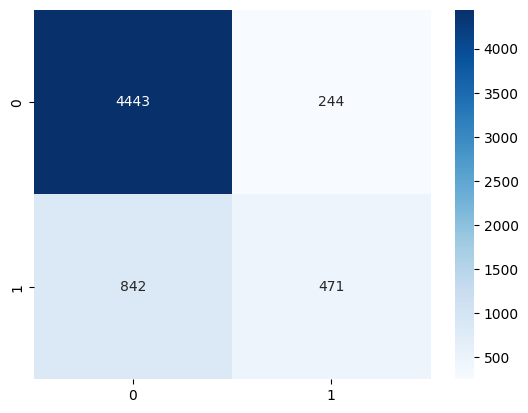

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

## Logistic Regression

Predicting Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[4687    0]
 [1313    0]]


0.7811666666666667

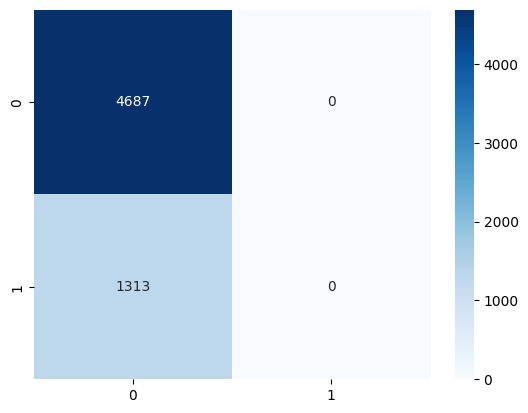

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 77.80 %
Standard Deviation: 0.04 %


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Kernel SVM

Predicting Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[4687    0]
 [1313    0]]


0.7811666666666667

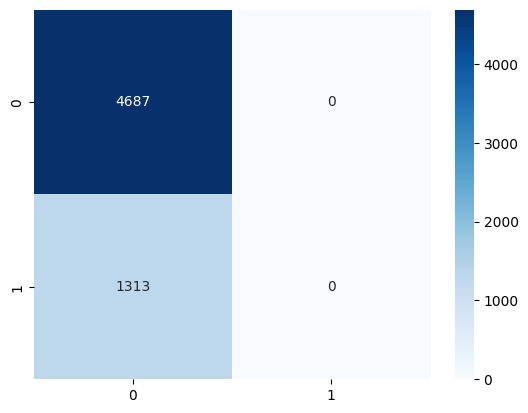

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.82 %
Standard Deviation: 0.02 %


## Decision Trees

Predicting Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[3791  896]
 [ 785  528]]


0.7198333333333333

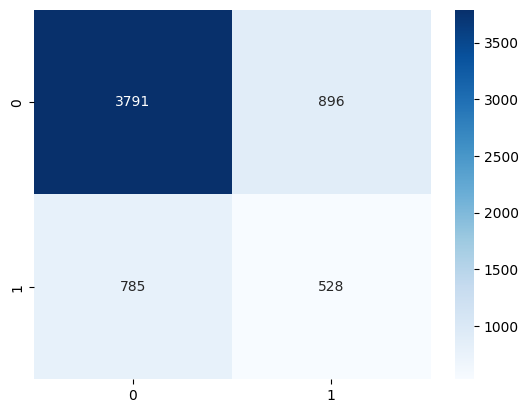

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.04 %
Standard Deviation: 1.13 %


## Random Forest

Predicting Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[4428  259]
 [ 877  436]]


0.8106666666666666

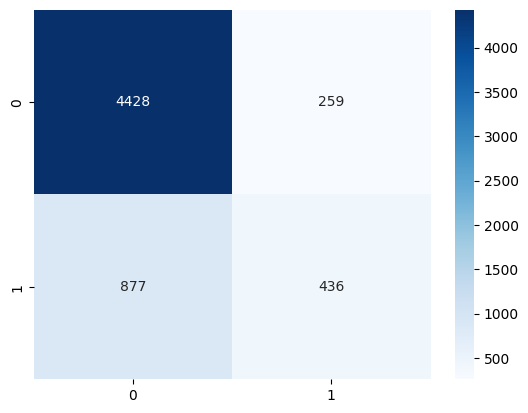

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.82 %
Standard Deviation: 0.78 %


## XG Boost

Predicting Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[4413  274]
 [ 837  476]]


0.8148333333333333

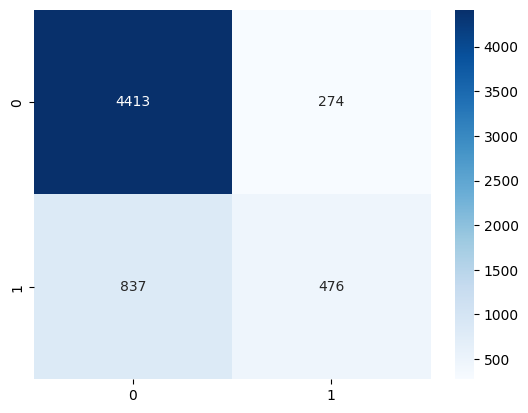

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.18 %
Standard Deviation: 0.65 %


## Cat Boost

Predcting Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[4453  234]
 [ 829  484]]


0.8228333333333333

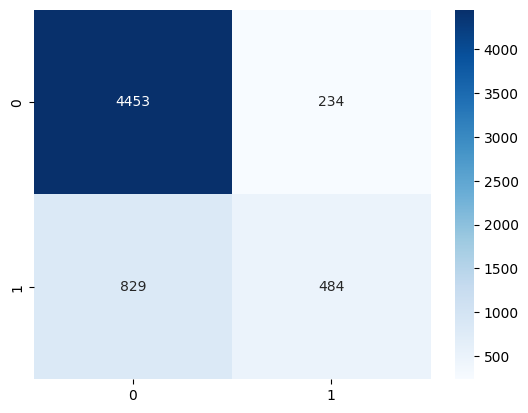

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.5757516	total: 87.9ms	remaining: 12.5s
7:	learn: 0.5643213	total: 99.8ms	remaining: 12.4s
8:	learn: 0.5536455	total: 111ms	remaining: 12.2s
9:	learn: 0.5442647	total: 122ms	remaining: 12.1s
10:	learn: 0.5356395	total: 134ms	remaining: 12s
11:	learn: 0.5275950	total: 146ms	remaining: 12s
12:	learn: 0.5200684	total: 157ms	remaining: 11.9s
13:	learn: 0.5129310	total: 169ms	remaining: 11.9s
14:	learn: 0.5067262	total: 180ms	remaining: 11.8s
15:	learn: 0.5008475	total: 192ms	remaining: 11.8s
16:	learn: 0.4954068	total: 211ms	remaining: 12.2s
17:	learn: 0.4906552	total: 222ms	remaining: 12.1s
18:	learn: 0.4862781	total: 234ms	remaining: 12.1s
19:	learn: 0.4822077	total: 245ms	remaining: 12s
20:	learn: 0.4782055	total: 257ms	remaining: 12s
21:	learn: 0.4746954	total: 269ms	remaining: 11.9s
22:	learn: 0.4715381	total: 280ms	remaining: 11.9s
23:	learn: 0.4685426	total: 291ms	remaining: 11.9s
24:	learn: 0.4658681	total: 303ms	remaini

# Credit Card Default Prediction

This notebook explores various machine learning models to predict credit card default based on a dataset of credit card clients. The goal is to build a model that can accurately predict whether a credit card client will default on their payment, which can be used by financial institutions to assess credit risk.

## Data
The dataset `default of credit card clients.xls` contains information about credit card clients, including demographic data, payment history, and billing statements. The target variable is whether the client defaulted on their payment.

## Methods Explored

The following classification algorithms were implemented and evaluated:

- Logistic Regression
- Kernel SVM
- Decision Trees
- Random Forest
- XGBoost
- CatBoost
- Artificial Neural Network (ANN)

## Evaluation

Each model was trained on the training set and evaluated on the test set using a confusion matrix and accuracy score. Cross-validation was also performed to assess the generalization performance of the models.

The metrics are not directly comparable because feature scaling was only applied before the ANN training.

Based on the current results, the **CatBoost** model appears to be the best performing method with an accuracy of 82.28% on the test set and a cross-validation accuracy of 82.13% with a standard deviation of 0.51%.